In [1]:
from Model import Levels, ElectronsTransitionsData, AtomsTransitionsData, UFloat, utilities
import numpy as np
import pandas as pd
from Model.utilities import n_, s_
from tqdm.auto import tqdm
from PlotUtils.saveToCsv import saveToCsv, getNextFilename
import re
from matplotlib.patches import Ellipse

from PlotUtils import errsPlot as plt, splt, confel

splt.set_export_folder(".")

In [2]:
n_g = 2.687e25
T_g = 300

real_value = {
    'T_e' : 2,
    'f_e' : 10**-5
}

In [3]:
data = pd.read_csv('exports/SimulatedData.csv', index_col = False).to_dict('list')

data['density'] = [ UFloat.UFloat( n, s ) for n, s in zip( data['density_n'], data['density_s'] ) ]
data['label_idx'] = Levels.Levels().namesToIdxs( data['label'] )

Initializing class Levels


In [25]:
# Loading data from a previous broad characterization
filename = 'results/fits002'

prev = pd.read_csv( filename + '.csv', index_col = False )

data_ulfiltered = [ ( x, y ) for x,y in zip( prev['f_e'], prev['T_e'] ) ]

filename = getNextFilename( basename = filename + "_pdf" )

In [29]:
avg_ulfiltered  = np.mean( data_ulfiltered, axis = 0 )
std_f_e = np.std( [ x for x,_ in data_ulfiltered ] )
std_T_e = np.std( [ y for _,y in data_ulfiltered ] )
data = []
for d in data_ulfiltered:
    if( abs( d[0] - avg_ulfiltered[0] )**2 / std_f_e**2 + abs( d[1] - avg_ulfiltered[1] )**2 / std_T_e**2 < 9 ):
        data.append( d )

avg = np.mean( data, axis = 0 )
count = len( data )
print( len( data_ulfiltered ), " - ", len( data ) )

500  -  488


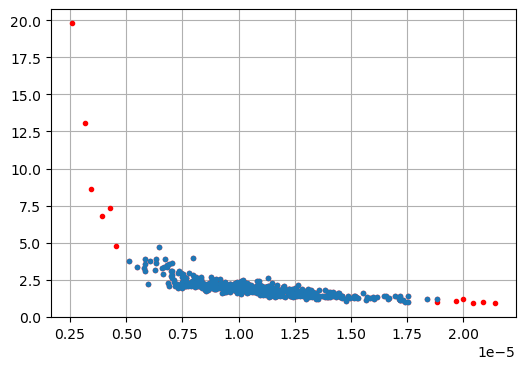

In [33]:
splt.init()
for k in range( len( data_ulfiltered ) ):
    plt.plot( *data_ulfiltered[k], '.', color='r' )
for k in range( count ):
    plt.plot( *data[k], '.', color='tab:blue' )

./results/fits002_pdf002_correlation.pdf


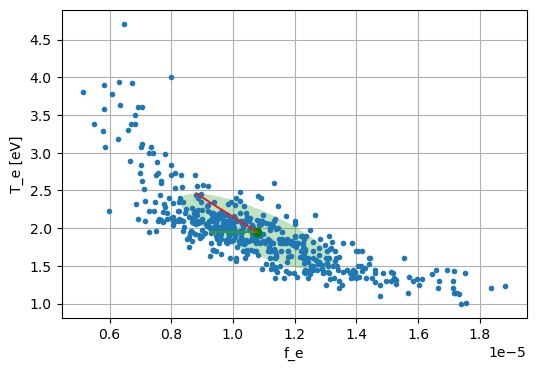

In [30]:
splt.init()
for k in range( count ):
    plt.plot( *data[k], '.', color='tab:blue' )
plt.plot( *avg, 'go', label = 'Average' )
corvec0, corvec1 = confel.confidence_ellipse( data )
confel.plot_corrvec( *avg, corvec0, corvec1 )

plt.xlabel("f_e")
plt.ylabel("T_e [eV]")

splt.export( filename + "_correlation" )

./results/fits002_pdf002_correlation_projected.pdf


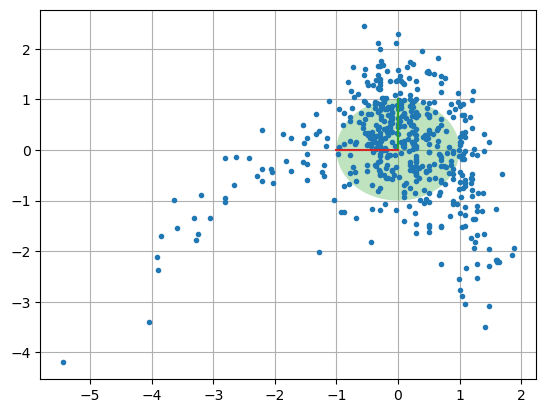

In [31]:
data_projected, corvec0_projected, corvec1_projected = confel.project( data - avg, corvec0, corvec1 )
for k in range( count ):
    plt.plot( *data_projected[k], '.', color='tab:blue' )
confel.plot_corrvec( np.mean( [ x for x,_ in data_projected ] ), np.mean( [ y for _,y in data_projected ] ), corvec0_projected, corvec1_projected )
confel.confidence_ellipse( data_projected )

splt.export( filename + "_correlation_projected" )

./results/fits002_pdf002_correlation_histograms.pdf


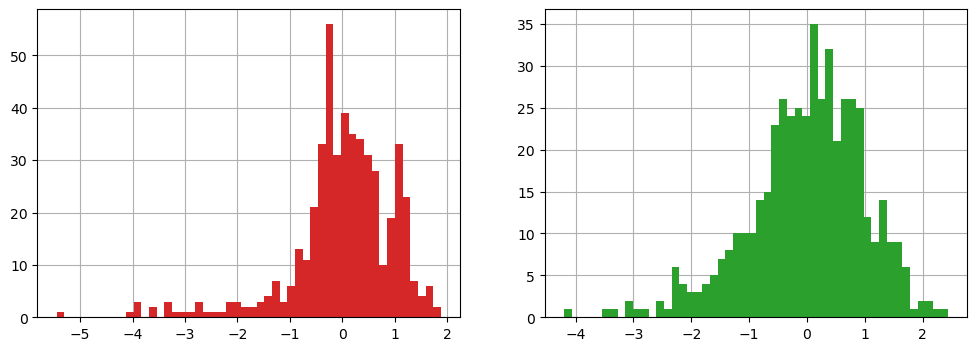

In [32]:
splt.init_bytot( 2 )

splt.next()
plt.hist( [ x for x,_ in data_projected ], color = confel.vec_cols[1], bins=50 )
splt.next()
plt.hist( [ y for _,y in data_projected ], color = confel.vec_cols[0], bins=50 )

splt.export( filename + "_correlation_histograms" )